In [1]:
import os
import torchvision
import pandas as pd
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader, ConcatDataset
from PIL import Image, ImageDraw
from torchvision.transforms import ToPILImage
from imports import BoxDataset, create_model
from torchvision.utils import draw_bounding_boxes

In [2]:
provinces = ["皖", "沪", "津", "渝", "冀", "晋", "蒙", "辽", "吉", "黑", "苏",
             "浙", "京", "闽", "赣", "鲁", "豫", "鄂", "湘", "粤", "桂", "琼",
             "川", "贵", "云", "藏", "陕", "甘", "青", "宁", "新", "警", "学",
             "O"]
alphabets = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N',
             'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'O']
ads = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P',
       'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4',
       '5', '6', '7', '8', '9', 'O']

In [3]:
dataset = BoxDataset('test.csv')
model = create_model(2, True)

tensor([0.9998], grad_fn=<IndexBackward0>)


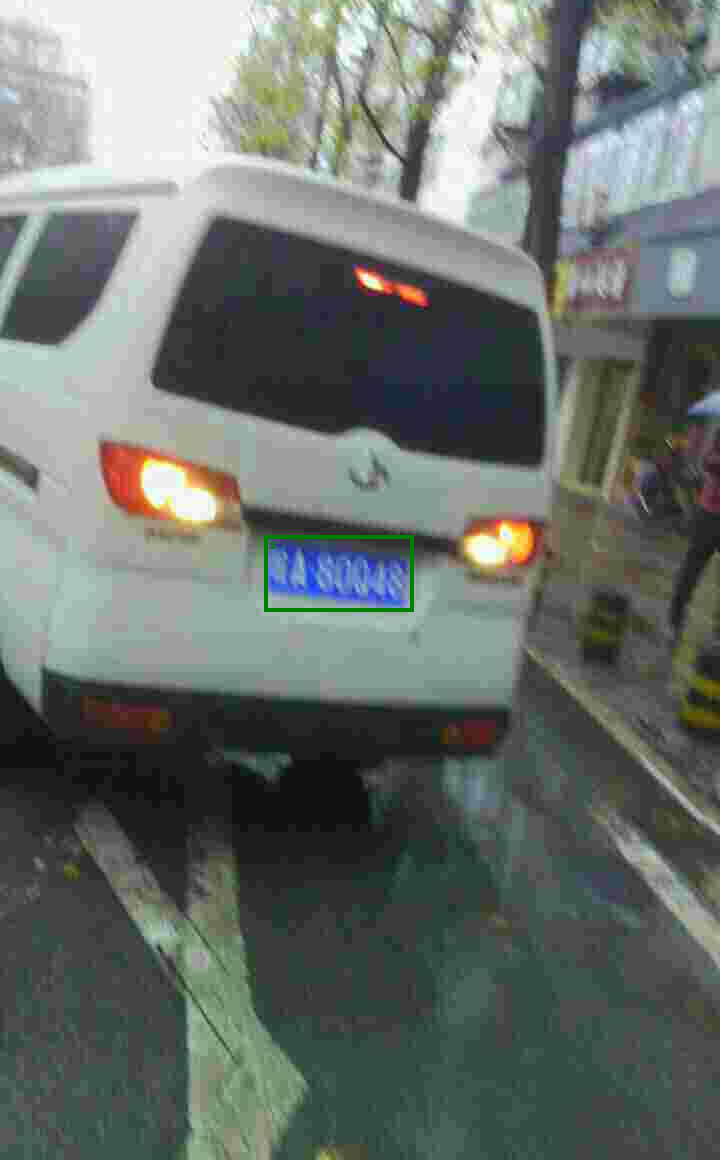

In [10]:
model.eval()
r = int(torch.randint(len(dataset), (1,)))
out = dataset[r]
image = out[0]
output = model(out[0].unsqueeze(dim=0))[0]
print(output['scores'])
boxes = output['boxes'][0:1]
labels = output['labels'][0:1].tolist()
for i in range(len(labels)):
    labels[i] = str(labels[i])
display(ToPILImage()(draw_bounding_boxes(image.mul(255).type(torch.uint8), boxes, labels, colors='green', width=4)))